# Pergunta 16

### Qual a concentração de docentes por região? A concentração em capitais é, proporcionalmente, maior?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
docente_column = ["CO_IES"]
docente = pd.read_csv(r"C:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\TP\TreatedDfs\Curated\Docente.csv", index_col=False, header=0, usecols=docente_column)

In [3]:
ies_column = ["CO_IES", "IN_CAPITAL", "CO_REGIAO"]
ies = pd.read_csv(r"C:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\TP\TreatedDfs\Curated\Ies.csv", index_col=False, header=0, usecols=ies_column )

In [4]:
# Lógica para substituir os códigos das regiões pelos seus respectivos nomes
ies["CO_REGIAO"] = ies.CO_REGIAO.replace([1,2,3,4,5], ["Norte", "Nordeste", "Sudeste", "Sul", "Centro-Oeste"])

# Lógica para substituir o IN_CAPITAL por interior ou capital para melhor entendimento
ies["IN_CAPITAL"] = ies.IN_CAPITAL.replace([0,1], ["Interior", "Capital"])

In [5]:
docente = docente.merge(ies, on="CO_IES", how='left') # Merge da tabela de docentes e IES para pegar os nomes das regiões

In [6]:
print(docente["CO_REGIAO"].value_counts().to_dict()) # Exibe a quantidade de docentes separados por região

{'Sudeste': 167199, 'Nordeste': 91520, 'Sul': 74825, 'Centro-Oeste': 38930, 'Norte': 26954}


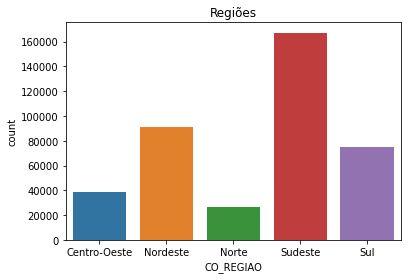

In [7]:
sns.countplot(x='CO_REGIAO', data=docente)
plt.title("Regiões")
plt.show()

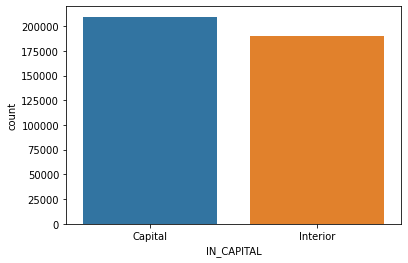

In [8]:
sns.countplot(x='IN_CAPITAL', data=docente) # Quantidade de docentes que trabalham para uma IES na capital ou interior
plt.show()

# Pergunta 17

### Qual o top 5 cursos mais concorridos? Em quais faculdades a concorrência por esses cursos é maior?

In [9]:
curso_column = ["CO_CINE_ROTULO", "QT_INSCRITO_TOTAL", "QT_VAGA_TOTAL"]
curso = pd.read_csv(r"C:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\TP\TreatedDfs\Curated\Curso.csv", index_col=False, header=0, usecols=curso_column)

In [10]:
cine_column = ["CO_CINE_ROTULO", "NO_CINE_ROTULO"]
cine = pd.read_csv(r"C:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\TP\TreatedDfs\Curated\CINE.CSV", index_col=False, header=0, usecols=cine_column)

In [11]:
curso = curso.merge(cine, on="CO_CINE_ROTULO", how='left') # Merge das tabelas de cursos e cine para pegar os nomes dos cursos

In [12]:
curso = curso.groupby("NO_CINE_ROTULO").sum() # Agrupa e soma por cursos

# Cria uma nova coluna sendo a relação de concorrência para cada curso (Quantidade de inscritos dividido pela quantidade de vaga)
curso["CONCORRENCIA"] = curso["QT_INSCRITO_TOTAL"] / curso["QT_VAGA_TOTAL"] 

In [13]:
grouped_curso = curso.sort_values(by="CONCORRENCIA", ascending=False) # ordena de acordo com a relação de concorrência

grouped_curso.head(5) # exibe os 5 cursos mais concorridos

,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL,CONCORRENCIA
NO_CINE_ROTULO,,,
Medicina,47539,1075264,22.618566
Engenharia aeroespacial,257,4513,17.560311
CiΩncias militares,629,9903,15.744038
Letras portuguΩs lφngua brasileira de sinais,89,896,10.067416
Estradas,217,2104,9.695853


# **Pergunta 18**

**Para respondermos essa pergunta, acreditamos que exibir os dados juntamente com um gráfico de barras para visualização seja interessante.**

In [16]:
cine_column = ["CO_CINE_ROTULO", "NO_CINE_AREA_ESPECIFICA"]
cine = pd.read_csv(r"C:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\TP\TreatedDfs\Curated\CINE.CSV", index_col=False, header=0)

In [17]:
alumn_column = ["ID_ALUNO", "IN_DEFICIENCIA", "CO_CINE_ROTULO"]
Talunos = pd.read_csv(r"C:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\TP\TreatedDfs\Curated\Aluno.csv", index_col=False, header=0, usecols=alumn_column)

c:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\AmbienteCDD\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [18]:
valid_situation = [1]
alunos = Talunos[Talunos['IN_DEFICIENCIA'].isin(valid_situation)]
# Isso busca apenas os alunos que possuem algum tipo de deficiência.

**Aqui temos as subareas e o número de alunos com deficiência que essa subarea possuem, e também o gráfico de barras mostrando esses dados.**

In [19]:
cine["CO_CINE_ROTULO"] = cine.CO_CINE_ROTULO.astype(str)
alunos["CO_CINE_ROTULO"] = alunos.CO_CINE_ROTULO.astype(str) 

result = alunos.merge(cine, on="CO_CINE_ROTULO", how='left')
# Merge em tabelas para adicionar a coluna NO_CINE_AREA_ESPECIFICA, que nos dará a informação das subareas.
result['NO_CINE_AREA_ESPECIFICA'].value_counts()

c:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\AmbienteCDD\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Educaτπo                                                                                              12957
Neg≤cios e administraτπo                                                                              11662
Sa·de                                                                                                  7956
Direito                                                                                                5807
Computaτπo e Tecnologias da Informaτπo e Comunicaτπo (TIC)                                             3500
CiΩncias sociais e comportamentais                                                                     3282
Engenharia e profiss⌡es correlatas                                                                     3125
Arquitetura e construτπo                                                                               2560
Produτπo e processamento                                                                               1076
Artes                       

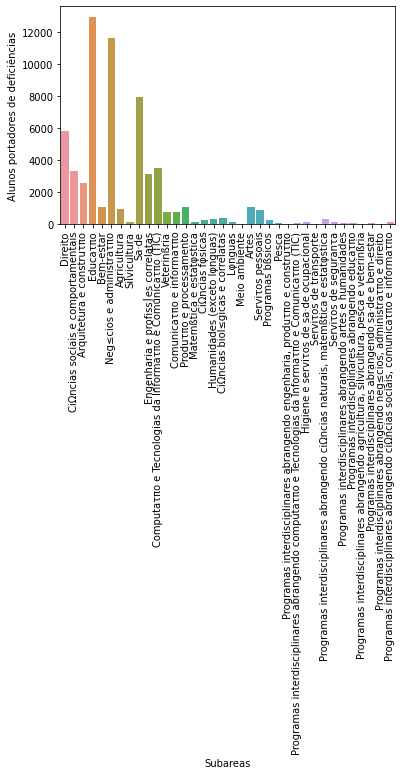

In [20]:
sns.countplot(x='NO_CINE_AREA_ESPECIFICA', data=result)
plt.xticks(rotation=90)
plt.xlabel("Subareas")
plt.ylabel("Alunos portadores de deficiências")
plt.show()

# Pergunta 19

### Qual a relação do número de concluintes de cursos de graduação presencial x à distância, por região?

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
curso_column = ["QT_CONCLUINTE_TOTAL", "CO_IES", "TP_MODALIDADE_ENSINO", "CO_CINE_ROTULO", "CO_CURSO"]
curso = pd.read_csv(r"C:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\TP\TreatedDfs\Curated\Curso.csv", index_col=False, header=0, usecols=curso_column, dtype={"QT_CONCLUINTE_TOTAL": float})


In [23]:
ies_column = ["CO_IES", "CO_REGIAO"]
ies = pd.read_csv(r"C:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\TP\TreatedDfs\Curated\Ies.csv", index_col=False, header=0, usecols=ies_column)

In [24]:
ies["CO_REGIAO"] = ies.CO_REGIAO.replace([1,2,3,4,5], ["Norte", "Nordeste", "Sudeste", "Sul", "Centro-Oeste"]) #Facilita leitura do gráfico

In [25]:
curso = curso.merge(ies, on="CO_IES", how='left') #Possibilita que verifiquemos em qual estado está a IES na qual o curso é oferecido

In [26]:
curso_pres = curso[curso["TP_MODALIDADE_ENSINO"] == 1] #Filtra para cursos presenciais
 
curso_dist = curso[curso["TP_MODALIDADE_ENSINO"] == 2] #Filtra para cursos a distância

O campo "QT_CONCLUINTE_TOTAL" informa quantos alunos concluintes temos por cada curso

CO_REGIAO
Centro-Oeste     82512.0
Nordeste        194370.0
Norte            64759.0
Sudeste         449664.0
Sul             142732.0
Name: QT_CONCLUINTE_TOTAL, dtype: float64


Text(0.5, 1.0, 'Presencial')

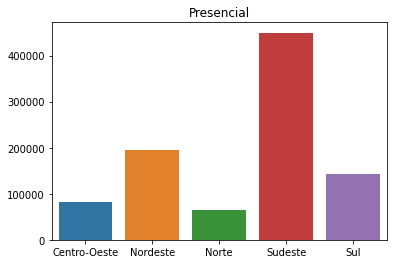

In [27]:
soma = curso_pres.groupby("CO_REGIAO")["QT_CONCLUINTE_TOTAL"].sum() 
print(soma)

sns.barplot(x=list(soma.keys()), y=list(dict(soma).values()))
plt.title("Presencial")

CO_REGIAO
Centro-Oeste     24333.0
Nordeste          9373.0
Norte              479.0
Sudeste         123147.0
Sul             158707.0
Name: QT_CONCLUINTE_TOTAL, dtype: float64


Text(0.5, 1.0, 'À distância')

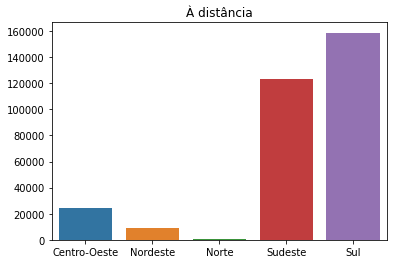

In [28]:
soma = curso_dist.groupby("CO_REGIAO")["QT_CONCLUINTE_TOTAL"].sum()
print(soma)

sns.barplot(x=list(soma.keys()), y=list(dict(soma).values()))
plt.title("À distância")

## Quantidade de alunos concluintes por curso, por região. A ideia é verificar se existem muitos profissionais de uma determinada área para a população

### Fonte para a população de cada região: https://ftp.ibge.gov.br/Estimativas_de_Populacao/Estimativas_2021/estimativa_dou_2021.pdf

In [29]:
cine = cine_columns = ["CO_CINE_ROTULO", "NO_CINE_ROTULO"]
cine = pd.read_csv(r"C:\Users\gmora\OneDrive\Área de Trabalho\Faculdade\CDD\TP\TreatedDfs\Curated\CINE.CSV", index_col=False, header=0, usecols=cine_columns)
curso = curso.merge(cine, on="CO_CINE_ROTULO", how='left')

In [30]:
pop_per_region = {'Norte': 18906962, 'Nordeste': 57667842, 'Sudeste': 89632912, 'Sul': 30402587, 'Centro': 16707336}

Digite qual curso deseja descobrir em quantos lugares é ofertado
Curso digitado: Direito

Concluintes por habitante:
CO_REGIAO
Centro-Oeste    0.000864
Nordeste        0.000450
Norte           0.000461
Sudeste         0.000579
Sul             0.000665
Name: QT_CONCLUINTE_TOTAL, dtype: float64


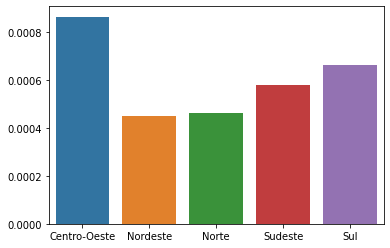

In [31]:
print("Digite qual curso deseja descobrir em quantos lugares é ofertado")
nome_curso_consultado = str(input())
print("Curso digitado:", nome_curso_consultado)

if nome_curso_consultado not in curso.NO_CINE_ROTULO.unique():
   print("\nCurso não encontrado. Favor verificar a lista de cursos válidos!")
else:
   print("\nConcluintes por habitante:")
   concluintes_curso = curso[curso.NO_CINE_ROTULO == nome_curso_consultado]
   concluintes_curso_per_region = concluintes_curso.groupby("CO_REGIAO")["QT_CONCLUINTE_TOTAL"].sum()
   concluintes_curso_per_region.Norte = concluintes_curso_per_region.Norte/pop_per_region["Norte"]
   concluintes_curso_per_region.Nordeste = concluintes_curso_per_region.Nordeste/pop_per_region["Nordeste"]
   concluintes_curso_per_region.Sudeste = concluintes_curso_per_region.Sudeste/pop_per_region["Sudeste"]
   concluintes_curso_per_region.Sul = concluintes_curso_per_region.Sul/pop_per_region["Sul"]
   concluintes_curso_per_region["Centro-Oeste"] = concluintes_curso_per_region["Centro-Oeste"]/pop_per_region["Centro"]
   sns.barplot(x=list(concluintes_curso_per_region.keys()), y=list(dict(concluintes_curso_per_region).values()))
   print(concluintes_curso_per_region)

# Questão 20

## Essa questão será abordada na próxima parte do trabalho, pois envolverá aplicação de Machine Learning